In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV ,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/diabetes_prediction_dataset.csv')

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
#Missing Values

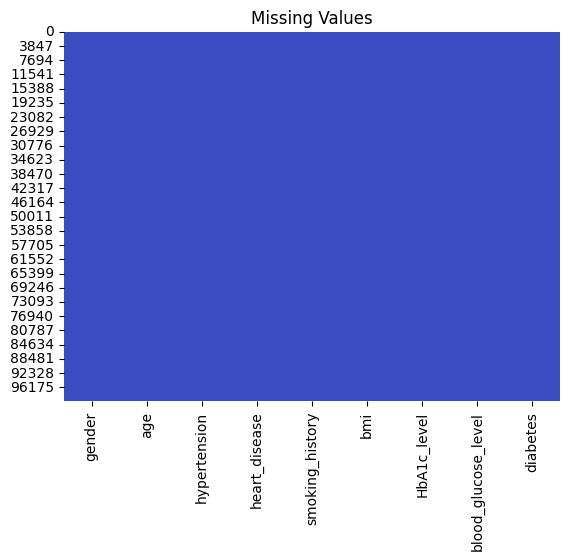

In [ ]:
sns.heatmap(df.isnull(), cbar=False , cmap='coolwarm')
plt.title('Missing Values')
plt.show()

In [ ]:
df.count()

,0
gender,100000
age,100000
hypertension,100000
heart_disease,100000
smoking_history,100000
bmi,100000
HbA1c_level,100000
blood_glucose_level,100000
diabetes,100000


In [ ]:
df.diabetes.value_counts()

,count
diabetes,
0,91500
1,8500


## Outlier Detetction

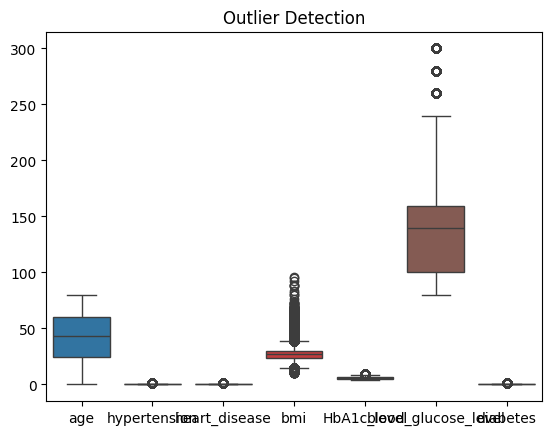

In [ ]:
sns.boxplot(df)
plt.title('Outlier Detection')
plt.show()

In [ ]:
## age

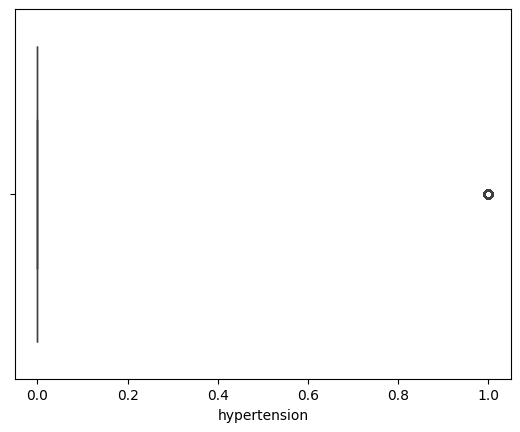

In [ ]:
sns.boxplot(x='hypertension' , data=df)
plt.show()

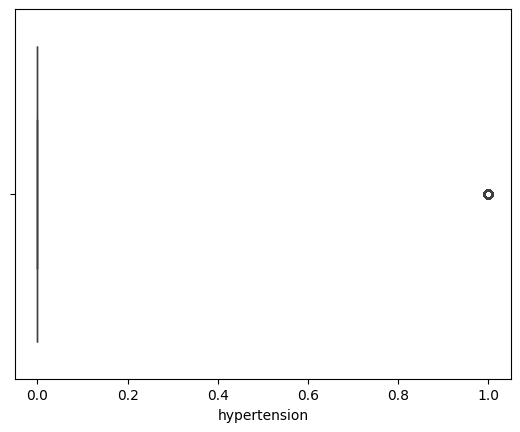

In [ ]:
sns.boxplot(x='hypertension' , data=df)
plt.show()

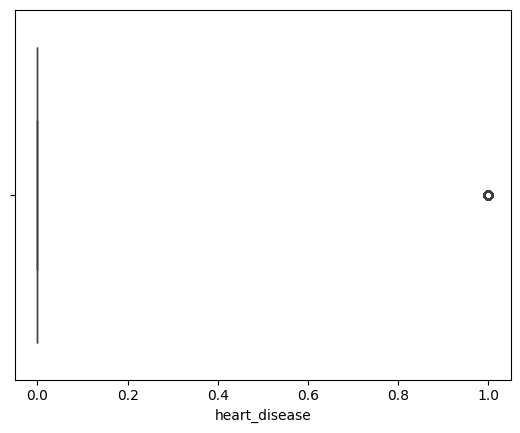

In [ ]:
sns.boxplot(x='heart_disease' ,data=df)
plt.show()

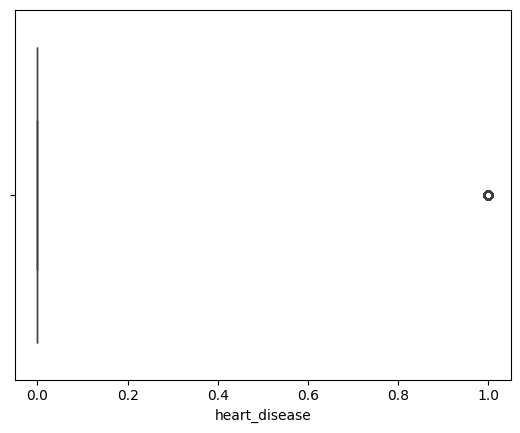

In [ ]:
sns.boxplot(x='heart_disease' , data=df)
plt.show()

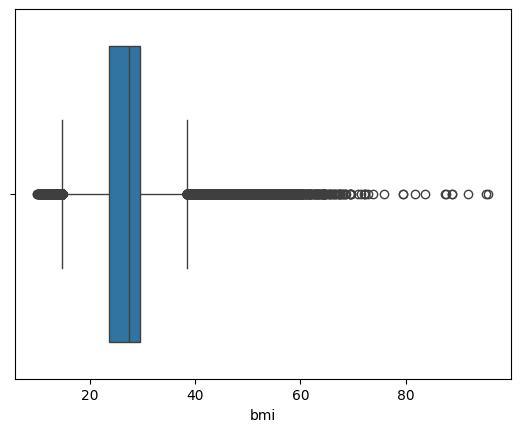

In [ ]:
sns.boxplot(x='bmi' , data=df)
plt.show()

In [ ]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR = Q3 - Q1

lowerbound = Q1 - (1.5 * IQR)
upperbound = Q3 + (1.5 * IQR)

df = df[(df.bmi >= lowerbound) & (df.bmi <= upperbound)]

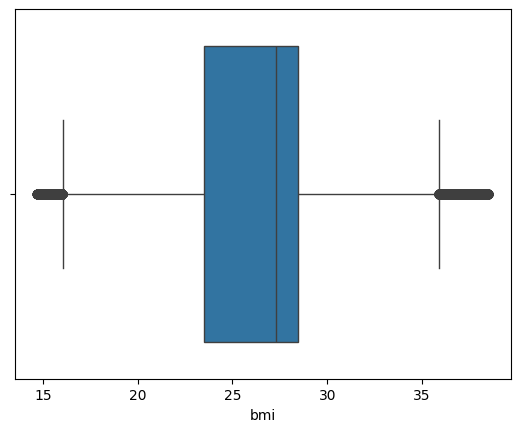

In [ ]:
sns.boxplot(x='bmi' ,data=df)
plt.show()

In [ ]:
lowerbound = df['bmi'].quantile(0.01)
upperbound = df['bmi'].quantile(0.99)

df = df[(df.bmi >= lowerbound) & (df.bmi <= upperbound)]

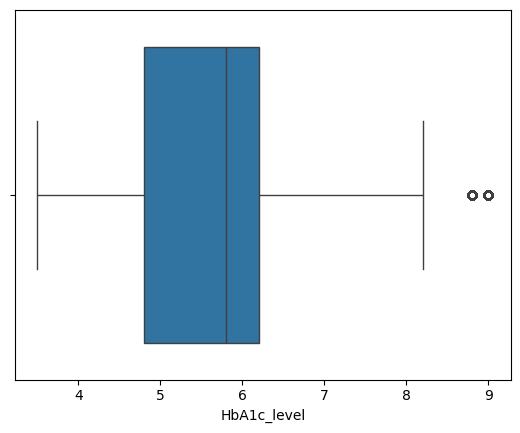

In [ ]:
sns.boxplot(x='HbA1c_level' , data=df)
plt.show()

In [ ]:
Q1 = df['HbA1c_level'].quantile(0.25)
Q3 = df['HbA1c_level'].quantile(0.75)

IQR = Q3 - Q1

lowerbound = Q1 - (1.5 * IQR)
upperbound = Q3 + (1.5 * IQR)

df = df[(df.HbA1c_level >= lowerbound) & (df.HbA1c_level <= upperbound)]

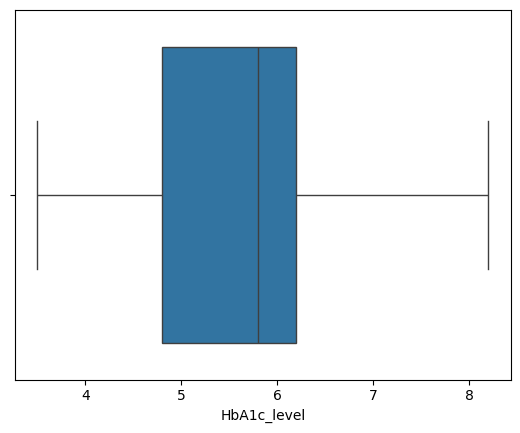

In [ ]:
sns.boxplot(x='HbA1c_level' , data=df)
plt.show()

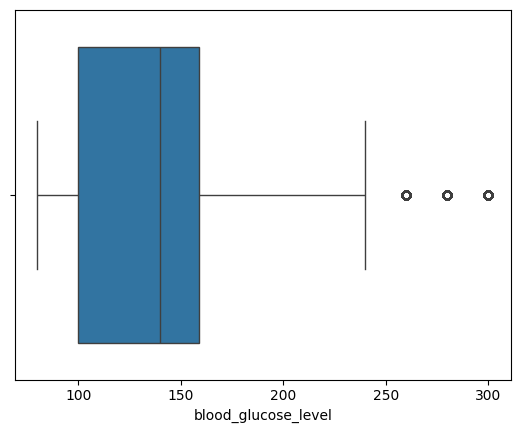

In [ ]:
sns.boxplot(x='blood_glucose_level' , data=df)
plt.show()

In [ ]:
Q1 = df['blood_glucose_level'].quantile(0.25)
Q3 = df['blood_glucose_level'].quantile(0.75)

IQR = Q3 - Q1

lowerbound = Q1 - (1.5 * IQR)
upperbound = Q3 + (1.5 * IQR)

df = df[(df.blood_glucose_level >= lowerbound) & (df.blood_glucose_level <= upperbound)]

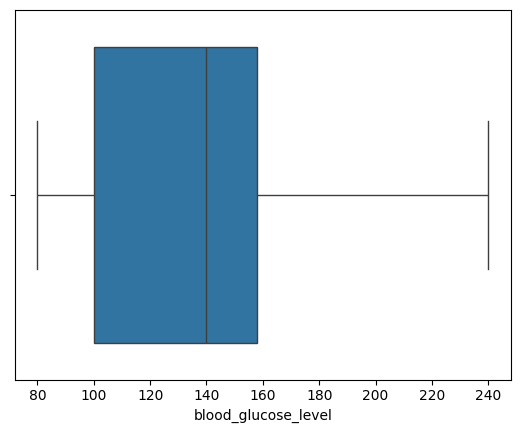

In [ ]:
sns.boxplot(x='blood_glucose_level' ,data=df)
plt.show()

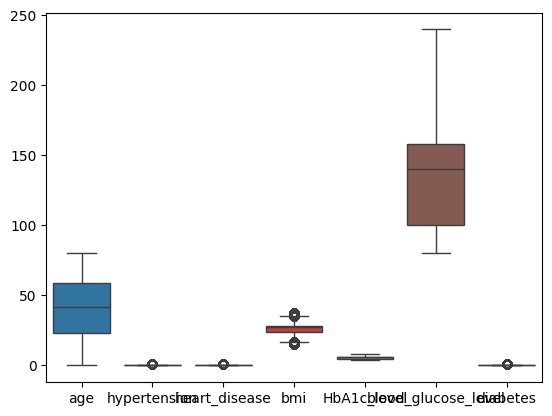

In [ ]:
sns.boxplot(df)
plt.show()

## Correlation

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df2=df.copy()

In [ ]:
le=LabelEncoder()

In [ ]:
df2['gender'] = le.fit_transform(df['gender'])
df2['smoking_history']= le.fit_transform(df['smoking_history'])

In [ ]:
df2.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


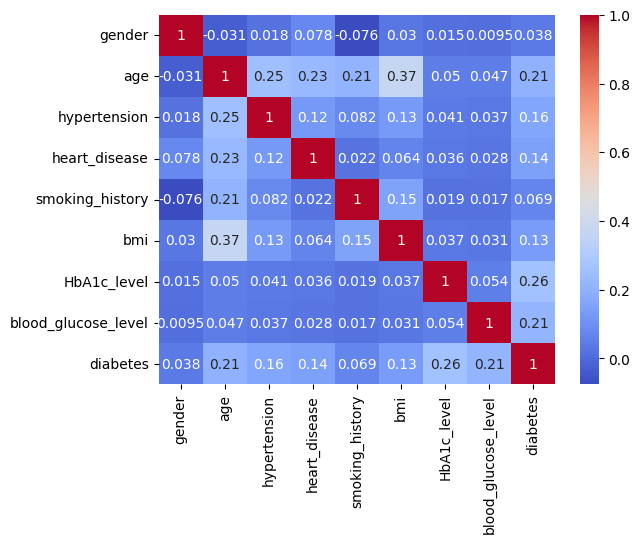

In [ ]:
sns.heatmap(df2.corr() , annot=True , cmap='coolwarm')
plt.show()

In [ ]:
df2=df2.drop(['gender','smoking_history'],axis=1)

In [ ]:
df2.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [ ]:
df2[df2['diabetes']==1]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
6,44.0,0,0,19.31,6.5,200,1
26,67.0,0,1,27.32,6.5,200,1
53,53.0,0,0,27.32,7.0,159,1
81,57.0,0,0,27.32,8.2,126,1
87,36.0,0,0,32.27,6.2,220,1
...,...,...,...,...,...,...,...
99854,71.0,0,0,32.00,5.8,155,1
99897,67.0,0,0,27.32,6.8,220,1
99919,74.0,0,0,29.51,8.2,130,1
99935,65.0,1,1,33.55,8.2,140,1


## Scaling

In [ ]:
scale= StandardScaler()

In [ ]:
numeric=df2[['age','bmi','HbA1c_level','blood_glucose_level']]

In [ ]:
numeric_s=pd.DataFrame(scale.fit_transform(numeric), columns=numeric.columns)

In [ ]:
df2=df2.drop(['age','bmi','HbA1c_level','blood_glucose_level'], axis=1)

In [ ]:
df2.reset_index(drop=True , inplace =True)

In [ ]:
df2=pd.concat([numeric_s,df2],axis=1)

In [ ]:
df2.head()

,age,bmi,HbA1c_level,blood_glucose_level,hypertension,heart_disease,diabetes
0,1.707940,-0.242931,1.150262,0.154314,0,1,0
1,0.548278,0.214878,1.150262,-1.550793,0,0,0
2,-0.611383,0.214878,0.245013,0.665846,0,0,0
3,-0.254564,-0.616916,-0.459070,0.580591,0,0,0
4,1.529531,-1.328347,-0.660236,0.580591,1,1,0


**Balancing**

In [ ]:
df2.diabetes.value_counts()

,count
diabetes,
0,84257
1,4371


In [ ]:
x= df2.drop(['diabetes'],axis=1)
y=df2['diabetes']

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
df_balanced = pd.DataFrame(x_resampled, columns=x.columns)
df_balanced['diabetes'] = y_resampled

In [ ]:
x= df_balanced.drop(['diabetes'],axis=1)
y=df_balanced['diabetes']

## Splitting

In [ ]:
x.shape

(168514, 6)

In [ ]:
y.shape

(168514,)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state =42)

## Model Training

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(x_train,y_train)

LogisticRegression()

In [ ]:
LR.score(x_test,y_test)

0.8543156395573095

In [ ]:
RF=RandomForestClassifier()

In [ ]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
RF.score(x_test,y_test)

0.9783105361540516

In [ ]:
RF_pred=RF.predict(x_test)

In [ ]:
classification_report(y_test,RF_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.98     16679\n           1       0.98      0.98      0.98     17024\n\n    accuracy                           0.98     33703\n   macro avg       0.98      0.98      0.98     33703\nweighted avg       0.98      0.98      0.98     33703\n'

In [ ]:
DT= DecisionTreeClassifier()

In [ ]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(x_test,y_test)

0.9680147167907901

In [ ]:
kn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
kn.score(x_test,y_test)

0.9449307183336795

In [ ]:
svc=SVC()

In [ ]:
svc.fit(x_train,y_train)

SVC()

In [ ]:
svc.score(x_test,y_test)

0.8884965730053704

In [ ]:
cv=  StratifiedKFold(n_splits=5)

In [ ]:
cross_val_score(RF,x_train,y_train,scoring='accuracy')

array([0.97641212, 0.97507603, 0.97507603, 0.97667087, 0.9755211 ])

## HyperParameter Tuning

In [ ]:
param_grids = {
    'svc': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [10, 20],
            'min_samples_split': [2, 5]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'saga'],
            'fit_intercept': [True]
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
}

In [ ]:
# for model_name, attri in param_grids.items():
#     grid_search = GridSearchCV(attri['model'], attri['params'], cv=cv, scoring='accuracy')
#     grid_search.fit(x_train, y_train)
#     print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
#     print(f"Best Score for {model_name}: {grid_search.best_score_}")
#     print("-------------------------------------------------------")

In [ ]:
RF=RandomForestClassifier(max_depth= 10, min_samples_split= 5, n_estimators= 100)

In [ ]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

In [ ]:
RF_pred = RF.predict(x_test)

In [ ]:
RF.score(x_test,y_test)

0.902056196777735

In [ ]:
LR_pred = LR.predict(x_test)


In [ ]:
svc_pred = svc.predict(x_test)

In [ ]:
Kn_pred = kn.predict(x_test)

In [ ]:
DT_pred = DT.predict(x_test)

In [ ]:
RF_s = RF.score(x_test,y_test)
LR_s = LR.score(x_test,y_test)
DT_s = DT.score(x_test,y_test)
Kn_s = kn.score(x_test,y_test)
svc_s = svc.score(x_test,y_test)




import pickle

with open('RF_s.pkl', 'wb') as file:
    pickle.dump(RF_s, file)
with open('LR_s.pkl', 'wb') as file:
    pickle.dump(LR_s, file)
with open('svc_s.pkl', 'wb') as file:
    pickle.dump(svc_s, file)
with open('Kn_s.pkl', 'wb') as file:
    pickle.dump(Kn_s, file)
with open('DT_s.pkl', 'wb') as file:
    pickle.dump(DT_s, file)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

### Classification Report

In [ ]:
RF_report = classification_report(y_test, RF_pred, output_dict=True)
# Convert the classification report to a DataFrame
RF_class = pd.DataFrame(RF_report).transpose()

In [ ]:
LR_report = classification_report(y_test, LR_pred, output_dict=True)
# Convert the classification report to a DataFrame
LR_class = pd.DataFrame(LR_report).transpose()

In [ ]:
svc_report = classification_report(y_test, svc_pred, output_dict=True)
# Convert the classification report to a DataFrame
svc_class = pd.DataFrame(svc_report).transpose()

In [ ]:
Kn_report = classification_report(y_test, Kn_pred, output_dict=True)
# Convert the classification report to a DataFrame
Kn_class = pd.DataFrame(Kn_report).transpose()

In [ ]:
DT_report = classification_report(y_test, DT_pred, output_dict=True)
# Convert the classification report to a DataFrame
DT_class = pd.DataFrame(DT_report).transpose()

In [ ]:
with open('RF_class.pkl', 'wb') as file:
    pickle.dump(RF_class, file)
with open('LR_class.pkl', 'wb') as file:
    pickle.dump(LR_class, file)
with open('svc_class.pkl', 'wb') as file:
    pickle.dump(svc_class, file)
with open('Kn_class.pkl', 'wb') as file:
    pickle.dump(kn_class, file)
with open('DT_class.pkl', 'wb') as file:
    pickle.dump(DT_class, file)

### Confusion Matrix

In [ ]:
cm_LR = confusion_matrix(y_test, LR_pred)
cm_RF = confusion_matrix(y_test, RF_pred)
cm_DT = confusion_matrix(y_test, DT_pred)
cm_Kn = confusion_matrix(y_test, Kn_pred)
cm_svc = confusion_matrix(y_test, svc_pred)

In [ ]:
with open('cm_RF.pkl', 'wb') as file:
    pickle.dump(cm_RF, file)
with open('cm_LR.pkl', 'wb') as file:
    pickle.dump(cm_LR, file)
with open('cm_svc.pkl', 'wb') as file:
    pickle.dump(cm_svc, file)
with open('cm_Kn.pkl', 'wb') as file:
    pickle.dump(cm_Kn, file)
with open('cm_DT.pkl', 'wb') as file:
    pickle.dump(cm_DT, file)

### ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
LR_score = LR.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_score)  # No need to binarize y_test for binary classification
LR_roc_auc = auc(LR_fpr, LR_tpr)

In [ ]:
RF_score = RF.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_score)  # No need to binarize y_test for binary classification
RF_roc_auc = auc(RF_fpr, RF_tpr)

In [ ]:
DT_score = DT.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
DT_fpr, DT_tpr, _ = roc_curve(y_test, DT_score)  # No need to binarize y_test for binary classification
DT_roc_auc = auc(DT_fpr, DT_tpr)

In [ ]:
Kn_score = kn.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
Kn_fpr, Kn_tpr, _ = roc_curve(y_test, Kn_score)  # No need to binarize y_test for binary classification
Kn_roc_auc = auc(Kn_fpr, Kn_tpr)

In [ ]:
svc_score = svc.decision_function(x_test)  # Decision function outputs for binary classification

# Compute the ROC curve and AUC
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_score)  # No need to binarize y_test for binary classification
svc_roc_auc = auc(svc_fpr, svc_tpr)

In [ ]:
with open('RF_fpr.pkl', 'wb') as file:
    pickle.dump(RF_fpr, file)
with open('LR_fpr.pkl', 'wb') as file:
    pickle.dump(LR_fpr, file)
with open('svc_fpr.pkl', 'wb') as file:
    pickle.dump(svc_fpr, file)
with open('Kn_fpr.pkl', 'wb') as file:
    pickle.dump(Kn_fpr, file)
with open('DT_fpr.pkl', 'wb') as file:
    pickle.dump(DT_fpr, file)

with open('RF_tpr.pkl', 'wb') as file:
    pickle.dump(RF_tpr, file)
with open('LR_tpr.pkl', 'wb') as file:
    pickle.dump(LR_tpr, file)
with open('svc_tpr.pkl', 'wb') as file:
    pickle.dump(svc_tpr, file)
with open('Kn_tpr.pkl', 'wb') as file:
    pickle.dump(Kn_tpr, file)
with open('DT_tpr.pkl', 'wb') as file:
    pickle.dump(DT_tpr, file)

with open('RF_roc_auc.pkl', 'wb') as file:
    pickle.dump(RF_roc_auc, file)
with open('LR_roc_auc.pkl', 'wb') as file:
    pickle.dump(LR_roc_auc, file)
with open('svc_roc_auc.pkl', 'wb') as file:
    pickle.dump(svc_roc_auc, file)
with open('Kn_roc_auc.pkl', 'wb') as file:
    pickle.dump(Kn_roc_auc, file)
with open('DT_roc_auc.pkl', 'wb') as file:
    pickle.dump(DT_roc_auc, file)

### Saving models

In [ ]:
import pickle

with open('RF.pkl', 'wb') as file:
    pickle.dump(RF, file)
with open('LR.pkl', 'wb') as file:
    pickle.dump(LR, file)
with open('svc.pkl', 'wb') as file:
    pickle.dump(svc, file)
with open('Kn.pkl', 'wb') as file:
    pickle.dump(kn, file)
with open('DT.pkl', 'wb') as file:
    pickle.dump(DT, file)

In [ ]:
df5=pd.DataFrame()

In [ ]:
df5['original']=y_test

In [ ]:
df5.reset_index(drop=True, inplace=True)

In [ ]:
df5['LR']=LR_pred

In [ ]:
df5['RF'] = RF_pred
df5['DT'] = DT_pred
df5['SVC'] = svc_pred
df5['KNN'] = Kn_pred

In [ ]:
df5.head()

,original,LR,RF,DT,SVC,KNN
0,1,1,1,1,1,1
1,1,0,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,1


In [ ]:
with open('df5.pkl', 'wb') as file:
    pickle.dump(df5, file)

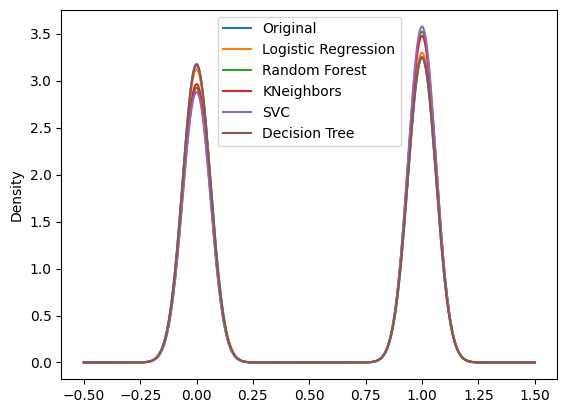

In [ ]:
df5['original'].plot(kind='kde' , label='Original')
df5['LR'].plot(kind='kde', label='Logistic Regression')
df5['RF'].plot(kind='kde', label='Random Forest')
df5['KNN'].plot(kind='kde', label='KNeighbors')
df5['SVC'].plot(kind='kde', label='SVC')
df5['DT'].plot(kind='kde', label='Decision Tree')

plt.legend()
plt.show()

In [ ]:
scale

StandardScaler()

In [ ]:
with open('scale.pkl', 'wb') as file:
    pickle.dump(scale, file)